In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from collections import defaultdict
import operator
#from pycorenlp import StanfordCoreNLP
import gensim
#from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

# To Plot matplotlib figures inline on the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_style("whitegrid")
#sns.set_style("darkgrid")

In [4]:
#!pip install sklearn

In [5]:
bookfile = "Herodotus.txt"
#bookfile = "lotr.txt"
#bookfile = "HungerGames.txt"
#bookfile = "Peter_Pan.txt"
#bookfile = 'got_all.txt'   #Game of Thrones books 1-5
#bookfile = '001ssb.txt'   #Game of Thrones book 1
#bookfile = 'The_Hobbit.txt'
#bookfile = 'Alice_in_Wonderland.txt'
with open('/Users/dlicht/Dropbox/_Metis_Bootcamp/projects/projectfletcher/books/trimmed/'+bookfile, 'r') as myfile:
    document = myfile.readlines()

In [6]:
book = []
for i in range(0,len(document)):
    book += [ re.sub(r"Page \d+","",document[i].replace('\n', '')) ] #get rid of "Page ###" and returns

In [7]:
#turn whole book into a single string, if it isn't already
wholebook = ""
for line in book:
    wholebook +=  " " + line
wholebook[:500]

'  BOOK I  Clio   These are the researches of Herodotus of Halicarnassus, which he publishes, in the hope of thereby preserving from decay the remembrance of what men have done, and of preventing the great and wonderful actions of the Greeks and the Barbarians from losing their due meed of glory; and withal to put on record what were their grounds of feuds. According to the Persians best informed in history, the Phoenicians began to quarrel. This people, who had formerly dwelt on the shores of th'

In [8]:
#tokenize the book

# Imports
from nltk.tokenize import word_tokenize, wordpunct_tokenize, WhitespaceTokenizer

# Word Tokenize: Creates tokens from words and punctuation
word_tokens = word_tokenize(wholebook)
#print("Results of word_tokenize: {}\n".format(word_tokens))
word_tokens[0:10]

['BOOK',
 'I',
 'Clio',
 'These',
 'are',
 'the',
 'researches',
 'of',
 'Herodotus',
 'of']

In [9]:
sentences = nltk.sent_tokenize(wholebook)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    #the below can be used if the book isn't already broken into sentances, but finds a few less names
#tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in book]
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
#tagged_sentences
#tokenized_sentences

In [10]:
NNP = []
for sent in tagged_sentences:
    for word,tag in sent:
        if tag == 'NNP' and word.isalpha() and len(word) > 1: NNP.append(word)  #isalpha() filters out punctuation
#NNP

In [11]:
word_freq = defaultdict(int)
for word in NNP:
    word_freq[word] += 1
#word_freq

In [12]:
from nltk.corpus import stopwords

stop = stopwords.words('english') + ["ser","lord","lady","i","ii","grand"]

cut = 6    #14 for Alice i Wonderland, ~ 30 for the Hobbit... depends on the book
common_CapWords = {}    
for word in word_freq:
    if (word_freq[word] > cut) and word.lower() not in stop:
        #print(word,word_freq[word])
        common_CapWords[word] = word_freq[word]
#for word in bigram_freq:
#    if (bigram_freq[word] > cut/2):
#        #print(word,word_freq[word])
#        common_CapWords[word] = bigram_freq[word]
common_CapWords

print(sum(common_CapWords.values()),"Name Mentions Found")
sorted_names = sorted(common_CapWords.items(), key=operator.itemgetter(1),reverse=True)
sorted_names

5772 Name Mentions Found


[('Darius', 243),
 ('Egypt', 242),
 ('Greeks', 214),
 ('Cyrus', 191),
 ('Croesus', 164),
 ('Athens', 101),
 ('Asia', 93),
 ('Libya', 93),
 ('Sardis', 90),
 ('Greece', 86),
 ('Cambyses', 86),
 ('Miletus', 70),
 ('Medes', 68),
 ('Nile', 68),
 ('Sparta', 64),
 ('Amasis', 61),
 ('Scythia', 60),
 ('Samos', 57),
 ('Delphi', 56),
 ('Histiaeus', 55),
 ('Aristagoras', 52),
 ('Ionia', 49),
 ('Hercules', 48),
 ('Harpagus', 47),
 ('Ister', 46),
 ('Smerdis', 46),
 ('Pythoness', 45),
 ('Persia', 45),
 ('Europe', 44),
 ('Cleomenes', 43),
 ('Miltiades', 42),
 ('Astyages', 40),
 ('Memphis', 40),
 ('Jupiter', 38),
 ('Scyths', 38),
 ('Demaratus', 35),
 ('Pisistratus', 34),
 ('Babylon', 33),
 ('Hellespont', 32),
 ('King', 32),
 ('Susa', 31),
 ('Persian', 30),
 ('Apollo', 29),
 ('Cyrene', 29),
 ('Polycrates', 29),
 ('Ariston', 29),
 ('Minerva', 28),
 ('Attica', 28),
 ('Magi', 28),
 ('Bacchus', 28),
 ('Periander', 27),
 ('Thebes', 27),
 ('Magus', 27),
 ('Otanes', 26),
 ('SS', 25),
 ('Alexander', 24),
 ('Psa

# Tuning Parameter Here!  How many names to include
#top n named entities:  much of the above was included int get_characters.py and could probably be eliminated

In [70]:
from get_characters import get_characters
# wrote a function for this previously
Namelist = get_characters(wholebook,50,5)
#Namelist

In [71]:
print(len(Namelist))
Namelist

50


['Darius',
 'Egypt',
 'Greeks',
 'Cyrus',
 'Croesus',
 'Athens',
 'Asia',
 'Libya',
 'Sardis',
 'Greece',
 'Cambyses',
 'Miletus',
 'Medes',
 'Nile',
 'Sparta',
 'Amasis',
 'Scythia',
 'Samos',
 'Delphi',
 'Histiaeus',
 'Aristagoras',
 'Ionia',
 'Hercules',
 'Harpagus',
 'Ister',
 'Smerdis',
 'Pythoness',
 'Persia',
 'Europe',
 'Cleomenes',
 'Miltiades',
 'Astyages',
 'Memphis',
 'Jupiter',
 'Scyths',
 'Demaratus',
 'Pisistratus',
 'Babylon',
 'Hellespont',
 'King',
 'Susa',
 'Persian',
 'Apollo',
 'Cyrene',
 'Polycrates',
 'Ariston',
 'Minerva',
 'Attica',
 'Magi',
 'Bacchus']

In [72]:
# CHARACTER NAME LIST NEEDS TO BE MANUALLY CURRATED
## if pseudonyms are present, replacement and re-tokenization is required.

In [73]:
Names = Namelist
for name in enumerate(Names): print(name)

(0, 'Darius')
(1, 'Egypt')
(2, 'Greeks')
(3, 'Cyrus')
(4, 'Croesus')
(5, 'Athens')
(6, 'Asia')
(7, 'Libya')
(8, 'Sardis')
(9, 'Greece')
(10, 'Cambyses')
(11, 'Miletus')
(12, 'Medes')
(13, 'Nile')
(14, 'Sparta')
(15, 'Amasis')
(16, 'Scythia')
(17, 'Samos')
(18, 'Delphi')
(19, 'Histiaeus')
(20, 'Aristagoras')
(21, 'Ionia')
(22, 'Hercules')
(23, 'Harpagus')
(24, 'Ister')
(25, 'Smerdis')
(26, 'Pythoness')
(27, 'Persia')
(28, 'Europe')
(29, 'Cleomenes')
(30, 'Miltiades')
(31, 'Astyages')
(32, 'Memphis')
(33, 'Jupiter')
(34, 'Scyths')
(35, 'Demaratus')
(36, 'Pisistratus')
(37, 'Babylon')
(38, 'Hellespont')
(39, 'King')
(40, 'Susa')
(41, 'Persian')
(42, 'Apollo')
(43, 'Cyrene')
(44, 'Polycrates')
(45, 'Ariston')
(46, 'Minerva')
(47, 'Attica')
(48, 'Magi')
(49, 'Bacchus')


In [104]:

Namelist = ['Darius',
 'Egypt',
 'Greeks',
 'Cyrus',
 'Croesus',
 'Athens',
 'Asia',
 'Libya',
 'Sardis',
 'Greece',
 'Cambyses',
 'Miletus',
 'Medes',
 'Nile',
 'Sparta',
 'Amasis',
 'Scythia',
 'Samos',
 'Delphi',
 'Histiaeus',
 'Aristagoras',
 'Ionia',
 'Hercules',
 'Harpagus',
 'Ister',
 'Smerdis',
 'Pythoness',
 'Persia',
 'Europe',
 'Cleomenes',
 'Miltiades',
 'Astyages',
 'Memphis',
 'Jupiter',
 'Scyths',
 'Demaratus',
 'Pisistratus',
 'Babylon']

In [105]:
def two_char_sentences(sentence_word_tokens,name1,name2,sentence_span=3):
    sentences = sentence_word_tokens

    two_char_sent = []
    last_sentences=[""]*(sentence_span-1)
    for sentence in sentences: 
        start = ""
        for sent in last_sentences:  start += sent + " " 

        n_sentences = start + " " + sentence

        if name1 in n_sentences and name2 in n_sentences:

            two_char_sent.append(n_sentences)
        last_sentences = last_sentences[1:sentence_span-1] + [sentence]
        #print(last_sentences)
    return two_char_sent,len(two_char_sent)

In [106]:
#all, for the matrix d3 and other uses
interaction_map_all = []
done_names = []
for name1 in Namelist:
    done_names.append(name1)
    print("Names Completed:",done_names)
    for name2 in Namelist:
        if name2 not in done_names:
            text, num_interactions = two_char_sentences(sentences,name1,name2)
            if num_interactions>-1: 
                interaction_map_all.append([name1,name2,num_interactions])
                print("added:",[name1,name2,num_interactions])
            else: 
                print(name1,name2,num_interactions,"interactions, skipping")
            
        else: print("skipped, already did reciprocal relationship", name2)

Names Completed: ['Darius']
skipped, already did reciprocal relationship Darius
added: ['Darius', 'Egypt', 60]
added: ['Darius', 'Greeks', 31]
added: ['Darius', 'Cyrus', 50]
added: ['Darius', 'Croesus', 2]
added: ['Darius', 'Athens', 24]
added: ['Darius', 'Asia', 60]
added: ['Darius', 'Libya', 19]
added: ['Darius', 'Sardis', 60]
added: ['Darius', 'Greece', 44]
added: ['Darius', 'Cambyses', 36]
added: ['Darius', 'Miletus', 33]
added: ['Darius', 'Medes', 13]
added: ['Darius', 'Nile', 6]
added: ['Darius', 'Sparta', 10]
added: ['Darius', 'Amasis', 1]
added: ['Darius', 'Scythia', 66]
added: ['Darius', 'Samos', 17]
added: ['Darius', 'Delphi', 1]
added: ['Darius', 'Histiaeus', 54]
added: ['Darius', 'Aristagoras', 36]
added: ['Darius', 'Ionia', 65]
added: ['Darius', 'Hercules', 1]
added: ['Darius', 'Harpagus', 3]
added: ['Darius', 'Ister', 28]
added: ['Darius', 'Smerdis', 6]
added: ['Darius', 'Pythoness', 1]
added: ['Darius', 'Persia', 235]
added: ['Darius', 'Europe', 25]
added: ['Darius', 'Cl

added: ['Asia', 'Harpagus', 5]
added: ['Asia', 'Ister', 0]
added: ['Asia', 'Smerdis', 1]
added: ['Asia', 'Pythoness', 0]
added: ['Asia', 'Persia', 91]
added: ['Asia', 'Europe', 49]
added: ['Asia', 'Cleomenes', 7]
added: ['Asia', 'Miltiades', 0]
added: ['Asia', 'Astyages', 11]
added: ['Asia', 'Memphis', 0]
added: ['Asia', 'Jupiter', 2]
added: ['Asia', 'Scyths', 12]
added: ['Asia', 'Demaratus', 4]
added: ['Asia', 'Pisistratus', 2]
added: ['Asia', 'Babylon', 6]
Names Completed: ['Darius', 'Egypt', 'Greeks', 'Cyrus', 'Croesus', 'Athens', 'Asia', 'Libya']
skipped, already did reciprocal relationship Darius
skipped, already did reciprocal relationship Egypt
skipped, already did reciprocal relationship Greeks
skipped, already did reciprocal relationship Cyrus
skipped, already did reciprocal relationship Croesus
skipped, already did reciprocal relationship Athens
skipped, already did reciprocal relationship Asia
skipped, already did reciprocal relationship Libya
added: ['Libya', 'Sardis', 3]
a

skipped, already did reciprocal relationship Nile
added: ['Nile', 'Sparta', 2]
added: ['Nile', 'Amasis', 6]
added: ['Nile', 'Scythia', 9]
added: ['Nile', 'Samos', 0]
added: ['Nile', 'Delphi', 1]
added: ['Nile', 'Histiaeus', 0]
added: ['Nile', 'Aristagoras', 0]
added: ['Nile', 'Ionia', 12]
added: ['Nile', 'Hercules', 7]
added: ['Nile', 'Harpagus', 0]
added: ['Nile', 'Ister', 17]
added: ['Nile', 'Smerdis', 0]
added: ['Nile', 'Pythoness', 0]
added: ['Nile', 'Persia', 11]
added: ['Nile', 'Europe', 14]
added: ['Nile', 'Cleomenes', 0]
added: ['Nile', 'Miltiades', 0]
added: ['Nile', 'Astyages', 0]
added: ['Nile', 'Memphis', 18]
added: ['Nile', 'Jupiter', 2]
added: ['Nile', 'Scyths', 0]
added: ['Nile', 'Demaratus', 0]
added: ['Nile', 'Pisistratus', 0]
added: ['Nile', 'Babylon', 0]
Names Completed: ['Darius', 'Egypt', 'Greeks', 'Cyrus', 'Croesus', 'Athens', 'Asia', 'Libya', 'Sardis', 'Greece', 'Cambyses', 'Miletus', 'Medes', 'Nile', 'Sparta']
skipped, already did reciprocal relationship Darius


skipped, already did reciprocal relationship Samos
skipped, already did reciprocal relationship Delphi
skipped, already did reciprocal relationship Histiaeus
skipped, already did reciprocal relationship Aristagoras
skipped, already did reciprocal relationship Ionia
skipped, already did reciprocal relationship Hercules
skipped, already did reciprocal relationship Harpagus
skipped, already did reciprocal relationship Ister
skipped, already did reciprocal relationship Smerdis
skipped, already did reciprocal relationship Pythoness
skipped, already did reciprocal relationship Persia
skipped, already did reciprocal relationship Europe
skipped, already did reciprocal relationship Cleomenes
skipped, already did reciprocal relationship Miltiades
skipped, already did reciprocal relationship Astyages
skipped, already did reciprocal relationship Memphis
skipped, already did reciprocal relationship Jupiter
skipped, already did reciprocal relationship Scyths
skipped, already did reciprocal relations

In [107]:
#only the strongest, for the d3 web map
interaction_map = []
done_names = []
for name1 in Namelist:
    done_names.append(name1)
    print("Names Completed:",done_names)
    for name2 in Namelist:
        if name2 not in done_names:
            text, num_interactions = two_char_sentences(sentences,name1,name2)
            if num_interactions>50: 
                interaction_map.append([name1,name2,num_interactions])
                print("added:",[name1,name2,num_interactions])
            else: 
                print(name1,name2,num_interactions,"interactions, skipping")
            
        else: print("skipped, already did reciprocal relationship", name2)

Names Completed: ['Darius']
skipped, already did reciprocal relationship Darius
added: ['Darius', 'Egypt', 60]
Darius Greeks 31 interactions, skipping
Darius Cyrus 50 interactions, skipping
Darius Croesus 2 interactions, skipping
Darius Athens 24 interactions, skipping
added: ['Darius', 'Asia', 60]
Darius Libya 19 interactions, skipping
added: ['Darius', 'Sardis', 60]
Darius Greece 44 interactions, skipping
Darius Cambyses 36 interactions, skipping
Darius Miletus 33 interactions, skipping
Darius Medes 13 interactions, skipping
Darius Nile 6 interactions, skipping
Darius Sparta 10 interactions, skipping
Darius Amasis 1 interactions, skipping
added: ['Darius', 'Scythia', 66]
Darius Samos 17 interactions, skipping
Darius Delphi 1 interactions, skipping
added: ['Darius', 'Histiaeus', 54]
Darius Aristagoras 36 interactions, skipping
added: ['Darius', 'Ionia', 65]
Darius Hercules 1 interactions, skipping
Darius Harpagus 3 interactions, skipping
Darius Ister 28 interactions, skipping
Darius S

Libya Pisistratus 0 interactions, skipping
Libya Babylon 3 interactions, skipping
Names Completed: ['Darius', 'Egypt', 'Greeks', 'Cyrus', 'Croesus', 'Athens', 'Asia', 'Libya', 'Sardis']
skipped, already did reciprocal relationship Darius
skipped, already did reciprocal relationship Egypt
skipped, already did reciprocal relationship Greeks
skipped, already did reciprocal relationship Cyrus
skipped, already did reciprocal relationship Croesus
skipped, already did reciprocal relationship Athens
skipped, already did reciprocal relationship Asia
skipped, already did reciprocal relationship Libya
skipped, already did reciprocal relationship Sardis
Sardis Greece 14 interactions, skipping
Sardis Cambyses 10 interactions, skipping
Sardis Miletus 20 interactions, skipping
Sardis Medes 6 interactions, skipping
Sardis Nile 1 interactions, skipping
Sardis Sparta 16 interactions, skipping
Sardis Amasis 8 interactions, skipping
Sardis Scythia 7 interactions, skipping
Sardis Samos 6 interactions, skip

Medes Samos 5 interactions, skipping
Medes Delphi 2 interactions, skipping
Medes Histiaeus 0 interactions, skipping
Medes Aristagoras 4 interactions, skipping
Medes Ionia 17 interactions, skipping
Medes Hercules 0 interactions, skipping
Medes Harpagus 14 interactions, skipping
Medes Ister 3 interactions, skipping
Medes Smerdis 0 interactions, skipping
Medes Pythoness 2 interactions, skipping
added: ['Medes', 'Persia', 67]
Medes Europe 1 interactions, skipping
Medes Cleomenes 3 interactions, skipping
Medes Miltiades 4 interactions, skipping
Medes Astyages 36 interactions, skipping
Medes Memphis 0 interactions, skipping
Medes Jupiter 0 interactions, skipping
Medes Scyths 2 interactions, skipping
Medes Demaratus 6 interactions, skipping
Medes Pisistratus 0 interactions, skipping
Medes Babylon 11 interactions, skipping
Names Completed: ['Darius', 'Egypt', 'Greeks', 'Cyrus', 'Croesus', 'Athens', 'Asia', 'Libya', 'Sardis', 'Greece', 'Cambyses', 'Miletus', 'Medes', 'Nile']
skipped, already di

Aristagoras Europe 0 interactions, skipping
Aristagoras Cleomenes 30 interactions, skipping
Aristagoras Miltiades 3 interactions, skipping
Aristagoras Astyages 0 interactions, skipping
Aristagoras Memphis 0 interactions, skipping
Aristagoras Jupiter 1 interactions, skipping
Aristagoras Scyths 0 interactions, skipping
Aristagoras Demaratus 0 interactions, skipping
Aristagoras Pisistratus 3 interactions, skipping
Aristagoras Babylon 0 interactions, skipping
Names Completed: ['Darius', 'Egypt', 'Greeks', 'Cyrus', 'Croesus', 'Athens', 'Asia', 'Libya', 'Sardis', 'Greece', 'Cambyses', 'Miletus', 'Medes', 'Nile', 'Sparta', 'Amasis', 'Scythia', 'Samos', 'Delphi', 'Histiaeus', 'Aristagoras', 'Ionia']
skipped, already did reciprocal relationship Darius
skipped, already did reciprocal relationship Egypt
skipped, already did reciprocal relationship Greeks
skipped, already did reciprocal relationship Cyrus
skipped, already did reciprocal relationship Croesus
skipped, already did reciprocal relation

Names Completed: ['Darius', 'Egypt', 'Greeks', 'Cyrus', 'Croesus', 'Athens', 'Asia', 'Libya', 'Sardis', 'Greece', 'Cambyses', 'Miletus', 'Medes', 'Nile', 'Sparta', 'Amasis', 'Scythia', 'Samos', 'Delphi', 'Histiaeus', 'Aristagoras', 'Ionia', 'Hercules', 'Harpagus', 'Ister', 'Smerdis', 'Pythoness', 'Persia', 'Europe', 'Cleomenes', 'Miltiades', 'Astyages', 'Memphis', 'Jupiter']
skipped, already did reciprocal relationship Darius
skipped, already did reciprocal relationship Egypt
skipped, already did reciprocal relationship Greeks
skipped, already did reciprocal relationship Cyrus
skipped, already did reciprocal relationship Croesus
skipped, already did reciprocal relationship Athens
skipped, already did reciprocal relationship Asia
skipped, already did reciprocal relationship Libya
skipped, already did reciprocal relationship Sardis
skipped, already did reciprocal relationship Greece
skipped, already did reciprocal relationship Cambyses
skipped, already did reciprocal relationship Miletus

In [108]:
interaction_map_all

[['Darius', 'Egypt', 60],
 ['Darius', 'Greeks', 31],
 ['Darius', 'Cyrus', 50],
 ['Darius', 'Croesus', 2],
 ['Darius', 'Athens', 24],
 ['Darius', 'Asia', 60],
 ['Darius', 'Libya', 19],
 ['Darius', 'Sardis', 60],
 ['Darius', 'Greece', 44],
 ['Darius', 'Cambyses', 36],
 ['Darius', 'Miletus', 33],
 ['Darius', 'Medes', 13],
 ['Darius', 'Nile', 6],
 ['Darius', 'Sparta', 10],
 ['Darius', 'Amasis', 1],
 ['Darius', 'Scythia', 66],
 ['Darius', 'Samos', 17],
 ['Darius', 'Delphi', 1],
 ['Darius', 'Histiaeus', 54],
 ['Darius', 'Aristagoras', 36],
 ['Darius', 'Ionia', 65],
 ['Darius', 'Hercules', 1],
 ['Darius', 'Harpagus', 3],
 ['Darius', 'Ister', 28],
 ['Darius', 'Smerdis', 6],
 ['Darius', 'Pythoness', 1],
 ['Darius', 'Persia', 235],
 ['Darius', 'Europe', 25],
 ['Darius', 'Cleomenes', 4],
 ['Darius', 'Miltiades', 9],
 ['Darius', 'Astyages', 4],
 ['Darius', 'Memphis', 6],
 ['Darius', 'Jupiter', 3],
 ['Darius', 'Scyths', 27],
 ['Darius', 'Demaratus', 9],
 ['Darius', 'Pisistratus', 2],
 ['Darius', 'B

In [109]:
interaction_map

[['Darius', 'Egypt', 60],
 ['Darius', 'Asia', 60],
 ['Darius', 'Sardis', 60],
 ['Darius', 'Scythia', 66],
 ['Darius', 'Histiaeus', 54],
 ['Darius', 'Ionia', 65],
 ['Darius', 'Persia', 235],
 ['Egypt', 'Greeks', 161],
 ['Egypt', 'Cyrus', 56],
 ['Egypt', 'Libya', 122],
 ['Egypt', 'Greece', 55],
 ['Egypt', 'Cambyses', 134],
 ['Egypt', 'Nile', 89],
 ['Egypt', 'Amasis', 98],
 ['Egypt', 'Persia', 138],
 ['Egypt', 'Memphis', 60],
 ['Greeks', 'Greece', 53],
 ['Greeks', 'Scythia', 52],
 ['Greeks', 'Ionia', 64],
 ['Greeks', 'Persia', 84],
 ['Cyrus', 'Croesus', 104],
 ['Cyrus', 'Cambyses', 117],
 ['Cyrus', 'Smerdis', 54],
 ['Cyrus', 'Persia', 199],
 ['Cyrus', 'Astyages', 60],
 ['Croesus', 'Sardis', 75],
 ['Croesus', 'Persia', 77],
 ['Asia', 'Persia', 91],
 ['Libya', 'Nile', 52],
 ['Sardis', 'Ionia', 58],
 ['Sardis', 'Persia', 77],
 ['Cambyses', 'Smerdis', 54],
 ['Cambyses', 'Persia', 145],
 ['Miletus', 'Aristagoras', 61],
 ['Miletus', 'Ionia', 72],
 ['Medes', 'Persia', 67],
 ['Sparta', 'Cleomenes

# word2vec

In [110]:
model = gensim.models.Word2Vec(tokenized_sentences, size=300, window=7, min_count=5, workers=7,sg=1)

In [111]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('sister', 0.9110525250434875),
 ('messenger', 0.9067116975784302),
 ('inquired', 0.9065955877304077),
 ('declared', 0.9013880491256714),
 ('Miltiades', 0.9002038240432739)]

In [112]:
model.similarity('woman','man')

0.85350311236242704

In [113]:
model.most_similar('Egypt')

[('passed', 0.9317626357078552),
 ('Phoenicia', 0.9239988327026367),
 ('introduced', 0.9225372672080994),
 ('Ethiopia', 0.9194051027297974),
 ('Europe', 0.9142459630966187),
 ('road', 0.9128560423851013),
 ('Crete', 0.9091219902038574),
 ('canal', 0.9075969457626343),
 ('market-place', 0.9068537950515747),
 ('Cyprus', 0.9057137966156006)]

In [114]:
character_vectors = []
for name in Namelist:
    character_vectors.append(model[name])
#character_vectors

In [115]:
character_vectors_df = pd.DataFrame(character_vectors)
#get rid of any NaN's in there
character_vectors_df.fillna(0,inplace=True) 
character_vectors_df.head(3)

0         1         2         3         4         5         6    \
0  0.084467 -0.017716 -0.247269 -0.014649 -0.024315  0.199942  0.157644   
1 -0.118434  0.088332  0.025138 -0.055661 -0.011403  0.147911 -0.005557   
2  0.175658 -0.049362  0.100716  0.070435  0.077162  0.000944  0.009635   

        7         8         9      ...          290       291       292  \
0  0.033467  0.050168  0.178942    ...    -0.094160  0.101669 -0.115556   
1 -0.037415  0.064958 -0.074855    ...    -0.022485  0.010789 -0.025511   
2 -0.053565 -0.049375  0.048563    ...    -0.092830 -0.031917  0.037530   

        293       294       295       296       297       298       299  
0  0.148020  0.063509 -0.129704  0.081684  0.050281 -0.080571 -0.017395  
1 -0.033722  0.012637 -0.115395  0.071513  0.009270 -0.050806 -0.068252  
2 -0.023368 -0.014417  0.017557  0.057213 -0.128362 -0.041013  0.037327  

[3 rows x 300 columns]

In [116]:
#Standardize vectors:  IMPORTANT!! gives MUCH better results in 2d
character_vectors_df_std = (character_vectors_df-character_vectors_df.mean())/character_vectors_df.std()

### SVD down to 2D

In [117]:
SVD = TruncatedSVD(n_components=2, n_iter=10, random_state=None, tol=0.0)

In [118]:
character_vectors_2d = SVD.fit_transform(character_vectors_df_std)

In [119]:
charpoints = pd.DataFrame([
        (name, coords[0], coords[1])
        for name, coords in [
            #(name, all_word_vectors_matrix_2d[thrones2vec.vocab[word].index])
            (Namelist[i], character_vectors_2d[i])
            for i in range(len(Namelist))
        ]
    ],
    columns=["name", "x", "y"]
)
charpoints.head()

name          x          y
0   Darius -14.301913  -1.188161
1    Egypt   8.304745  -2.769430
2   Greeks  12.859477  19.241279
3    Cyrus -17.306922   5.445990
4  Croesus -14.566746   4.405430

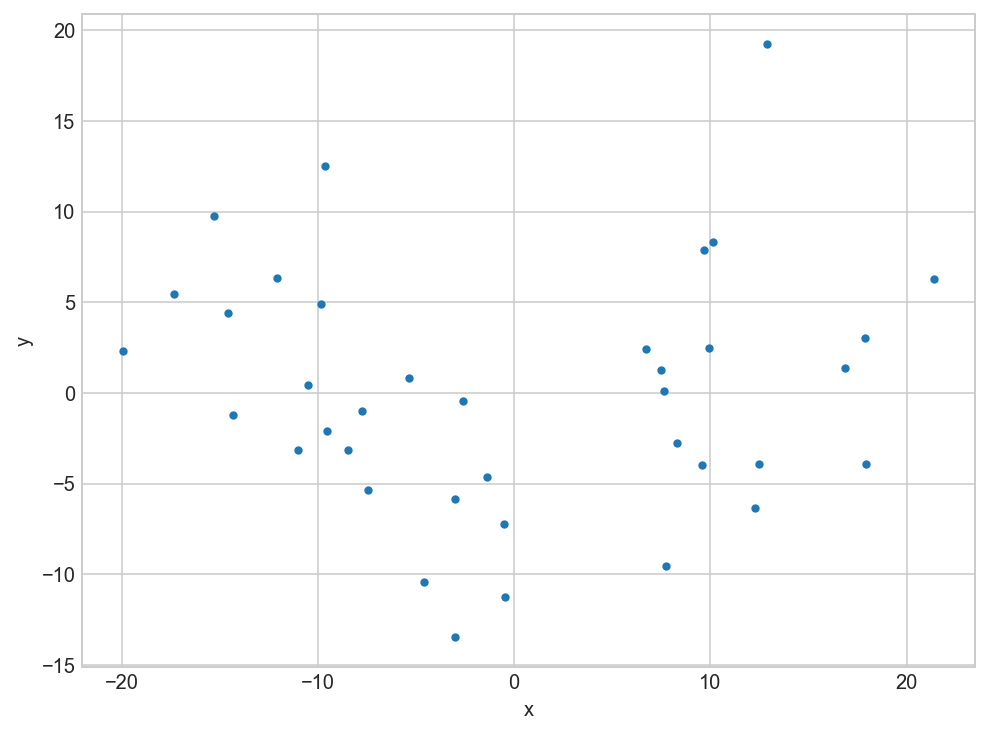

In [120]:
charpoints.plot.scatter("x", "y", s=10, figsize=(8, 6))
plt.show()

In [121]:
def plot_region(dataframe,x_bounds, y_bounds):
    slice = dataframe[
        (x_bounds[0] <= dataframe.x) &
        (dataframe.x <= x_bounds[1]) & 
        (y_bounds[0] <= dataframe.y) &
        (dataframe.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.010, point.y + 0.006, Namelist[point.name], fontsize=11)

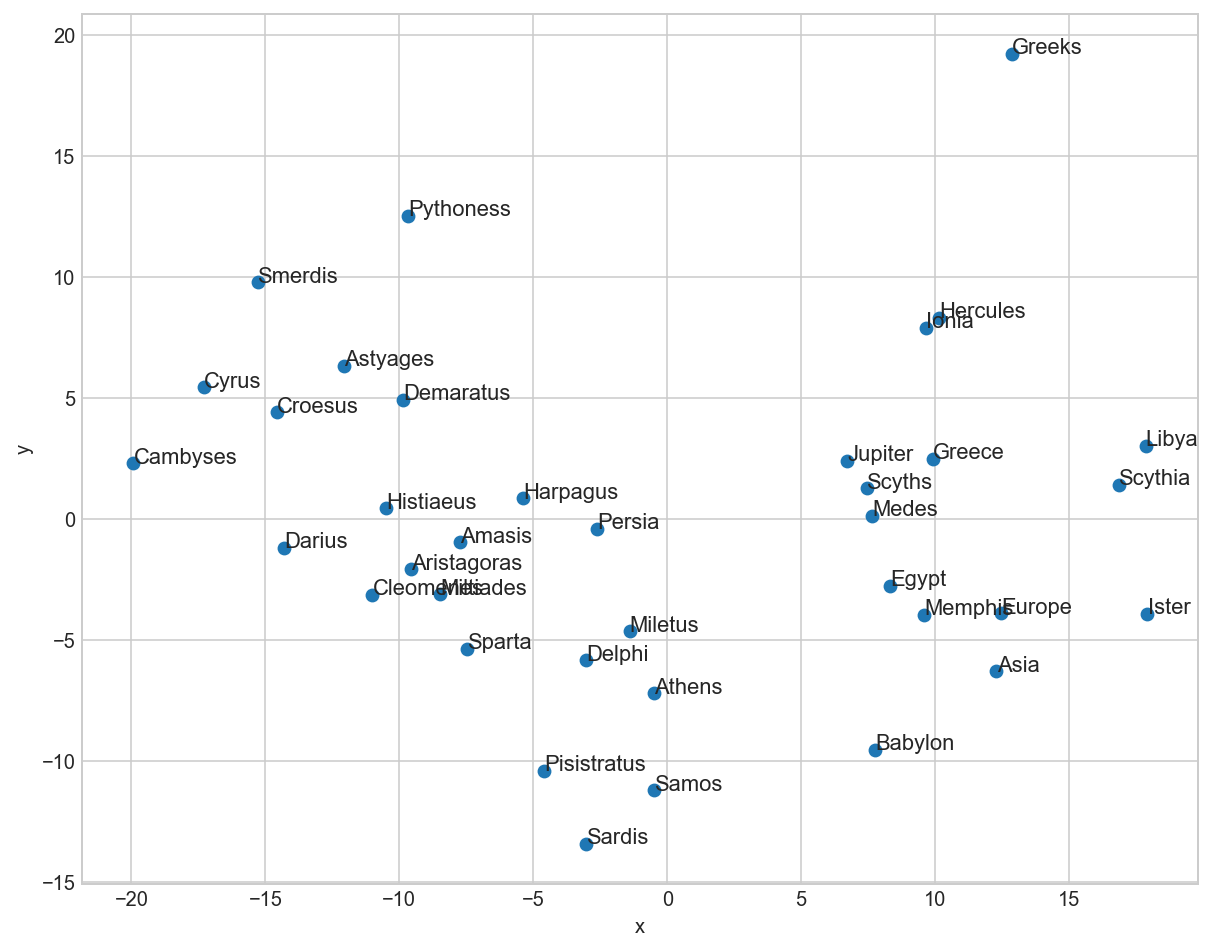

In [122]:
plot_region(charpoints, x_bounds=(-20,20), y_bounds=(-20,20)) #increase y to see Dothraki

In [123]:
len(Namelist)

38

In [124]:
# set up for plotting clusters
def plot_clusters(dataframe,clusters,x_bounds, y_bounds,colormap='rainbow'):
    slice = dataframe[
        (x_bounds[0] <= dataframe.x) &
        (dataframe.x <= x_bounds[1]) & 
        (y_bounds[0] <= dataframe.y) &
        (dataframe.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", c=clusters, colormap=colormap, s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.008, point.y + 0.006, Namelist[point.name], fontsize=11)

## Time for clustering

In [125]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

In [126]:
#accidently changed variable name in clustering, assocciating them here
Vectors = character_vectors
len(Vectors),len(Namelist)

(38, 38)

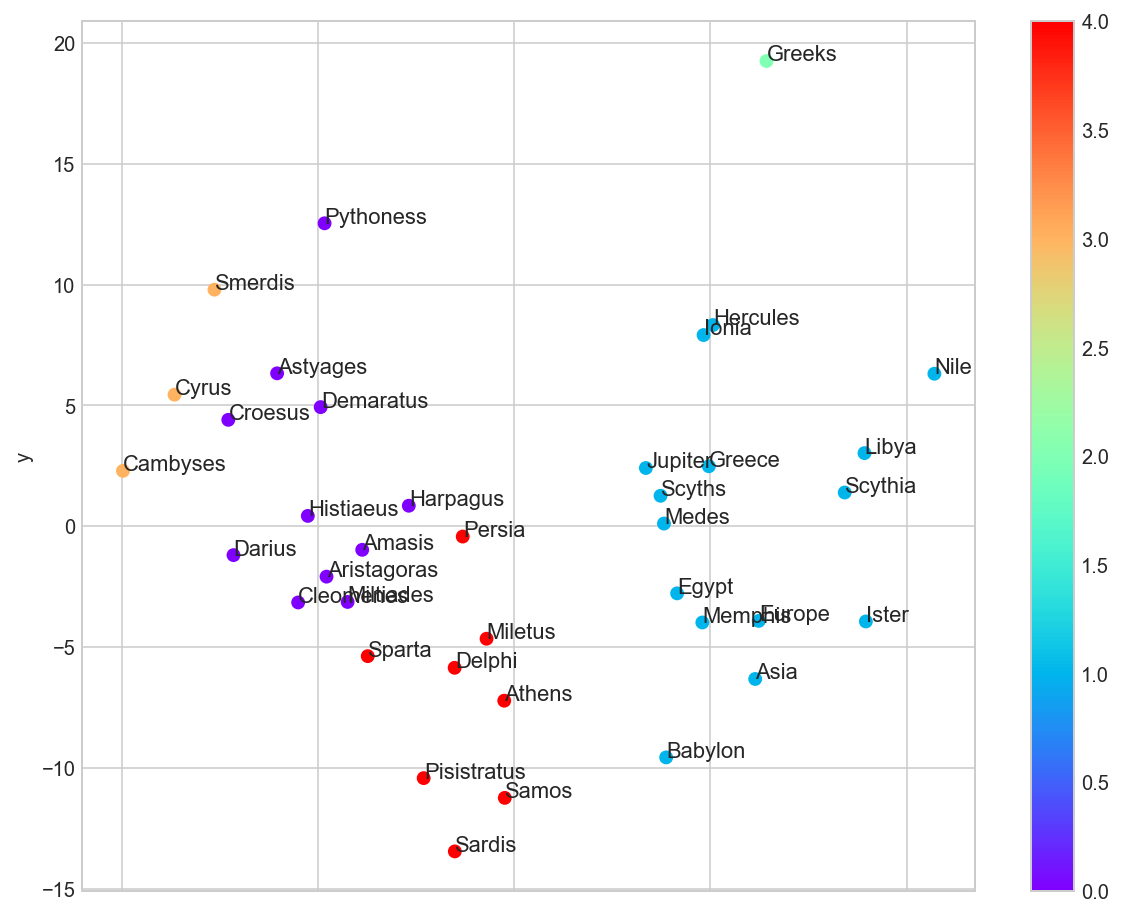

In [127]:
KM_model = KMeans(n_clusters=5,n_jobs=-2)
clusters = KM_model.fit_predict(Vectors)
ii = np.argsort(clusters)
list(zip(np.array(Namelist)[ii],clusters[ii]))
plot_clusters(charpoints,clusters, x_bounds=(-25,25), y_bounds=(-25,25),colormap='rainbow') #increase y to see Dothraki

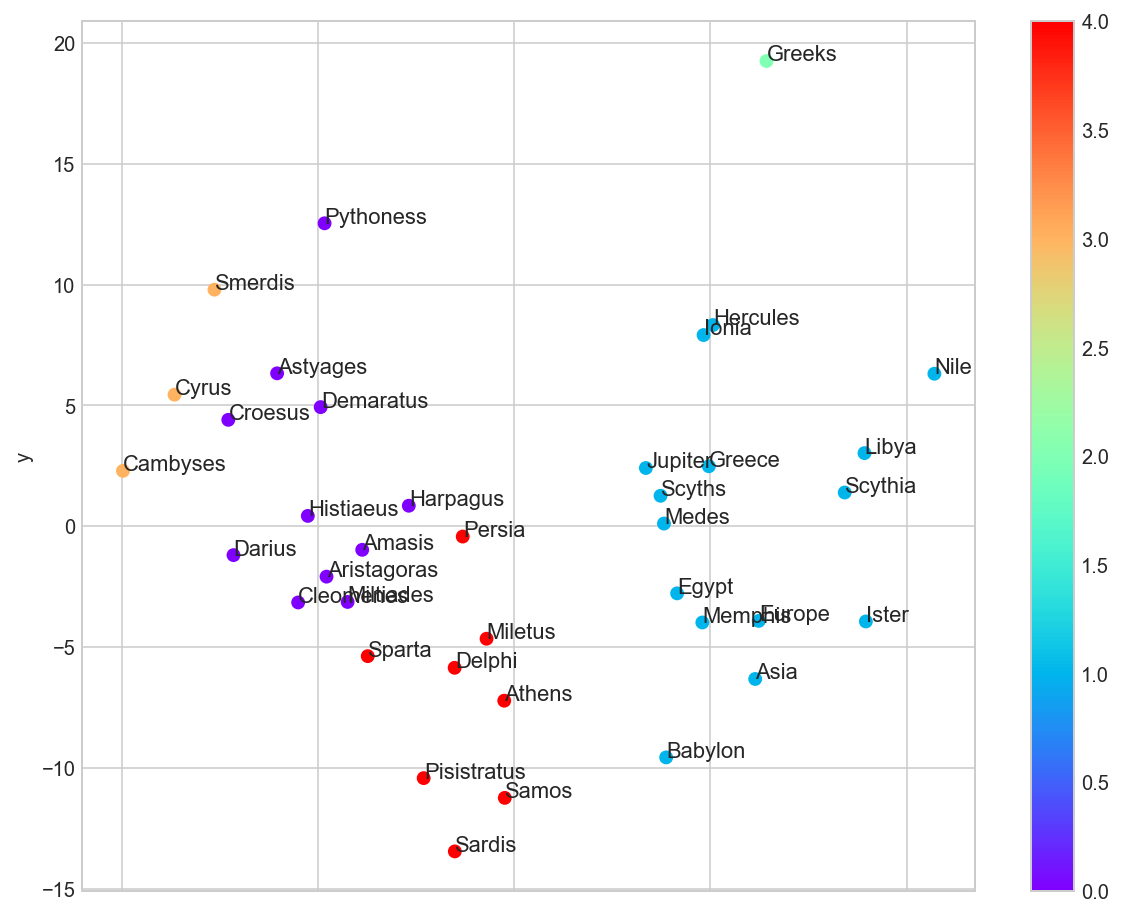

In [128]:
x_bounds=(-130,130)
y_bounds=(-200,200)
slice = charpoints[
    (x_bounds[0] <= charpoints.x) &
    (charpoints.x <= x_bounds[1]) & 
    (y_bounds[0] <= charpoints.y) &
    (charpoints.y <= y_bounds[1])
]

ax = slice.plot.scatter("x", "y", c=list(clusters), colormap='rainbow', s=35, figsize=(10, 8))
for i, point in slice.iterrows():
    ax.text(point.x + 0.008, point.y + 0.006, Namelist[point.name], fontsize=11)

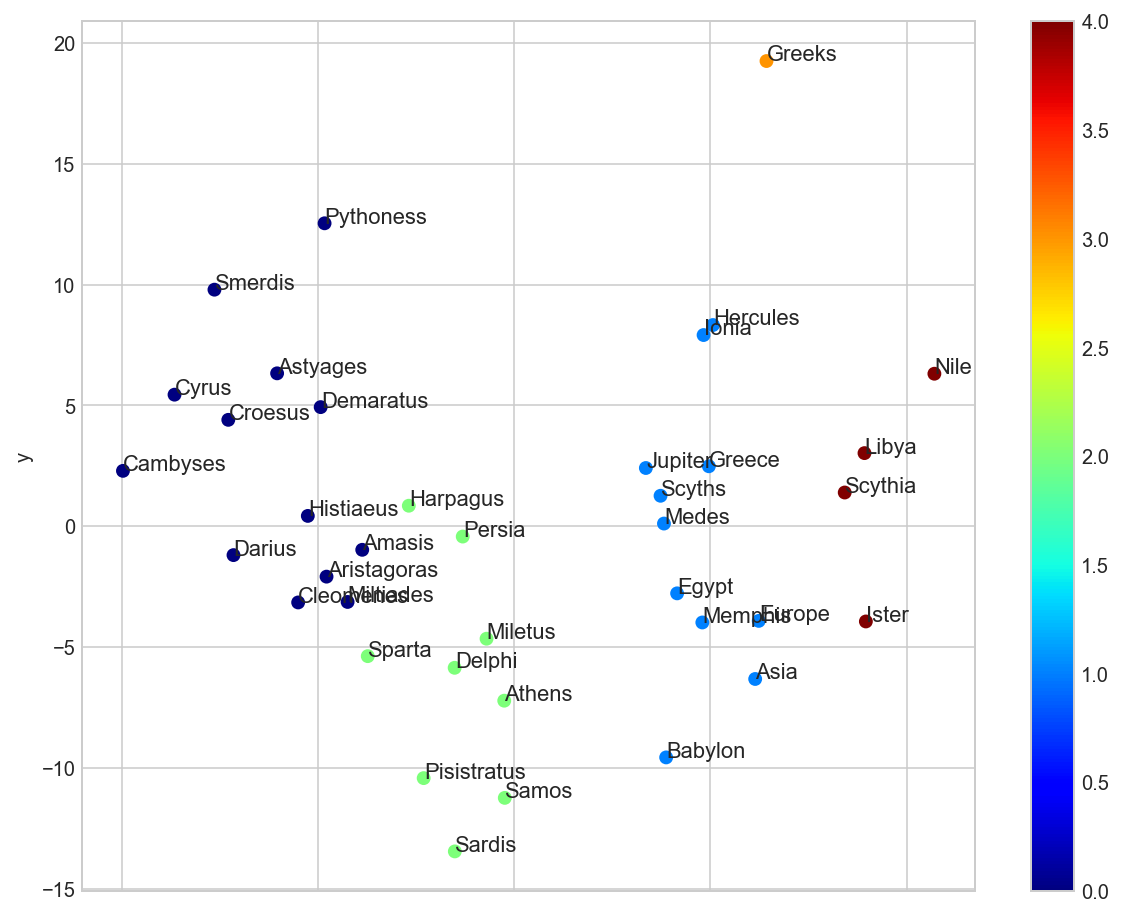

In [129]:
AC_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
clusters = AC_model.fit_predict(Vectors)
plot_clusters(charpoints,clusters, x_bounds=(-100,100), y_bounds=(-100,100),colormap='jet')

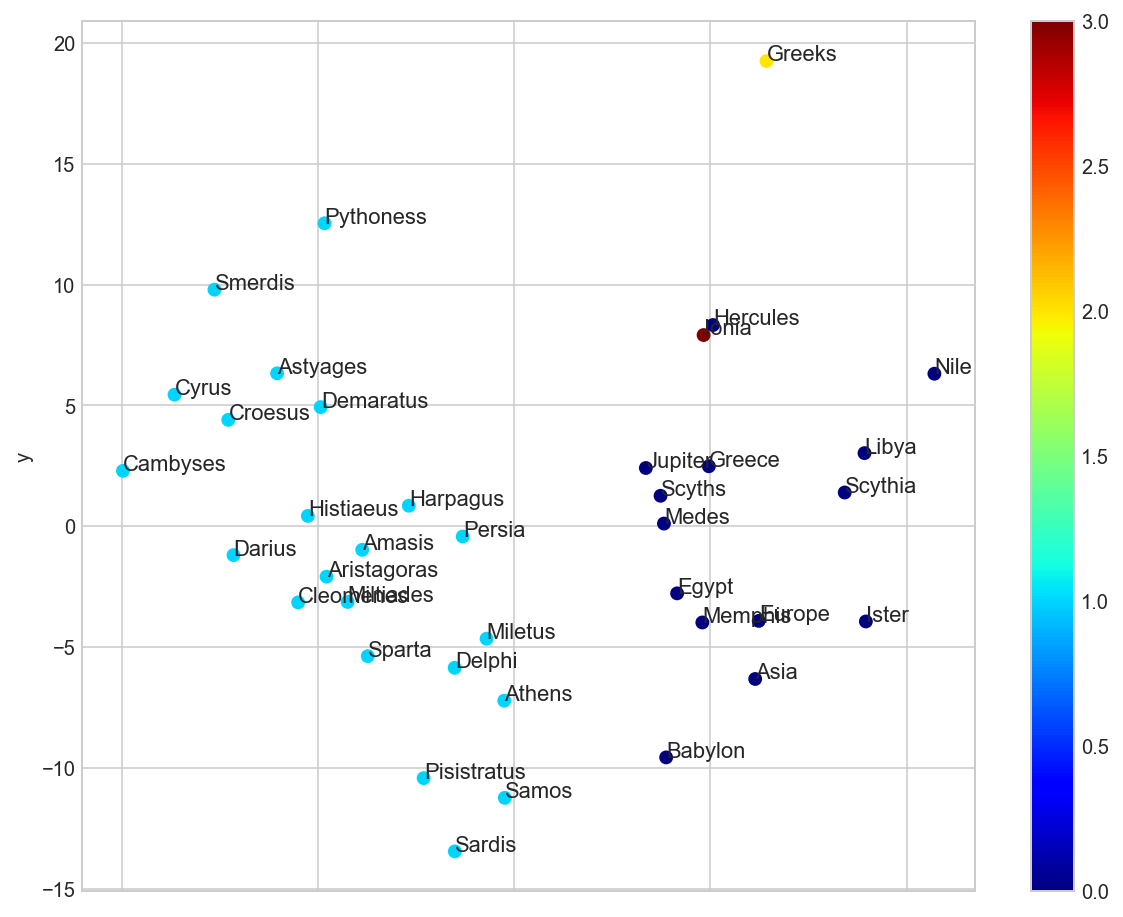

In [130]:
AC_model = AgglomerativeClustering(n_clusters=4, affinity='cosine',linkage='average')
clusters = AC_model.fit_predict(Vectors)
plot_clusters(charpoints,clusters, x_bounds=(-100,100), y_bounds=(-100,100),colormap='jet')

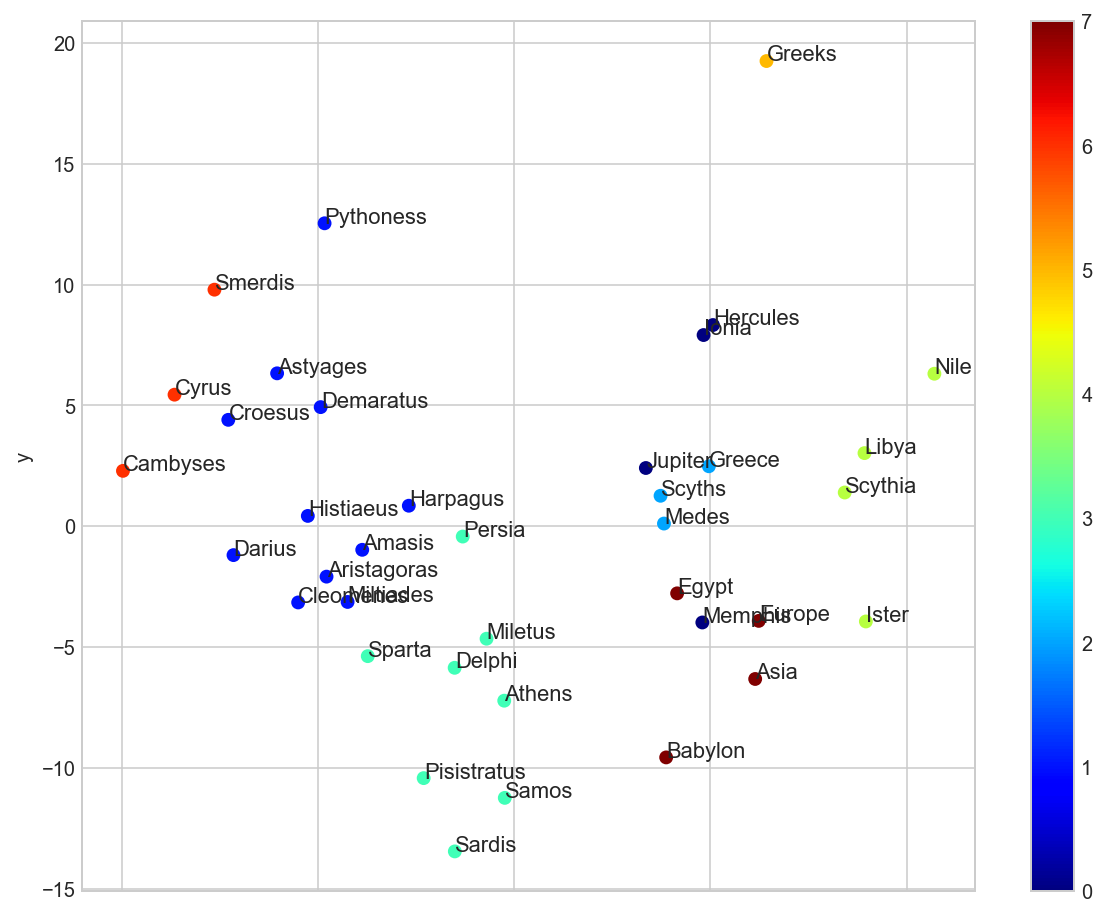

In [131]:
#?
AC_model = AgglomerativeClustering(n_clusters=8, affinity='cosine',linkage='complete')
clusters = AC_model.fit_predict(Vectors)
plot_clusters(charpoints,clusters, x_bounds=(-100,100), y_bounds=(-100,100),colormap='jet')

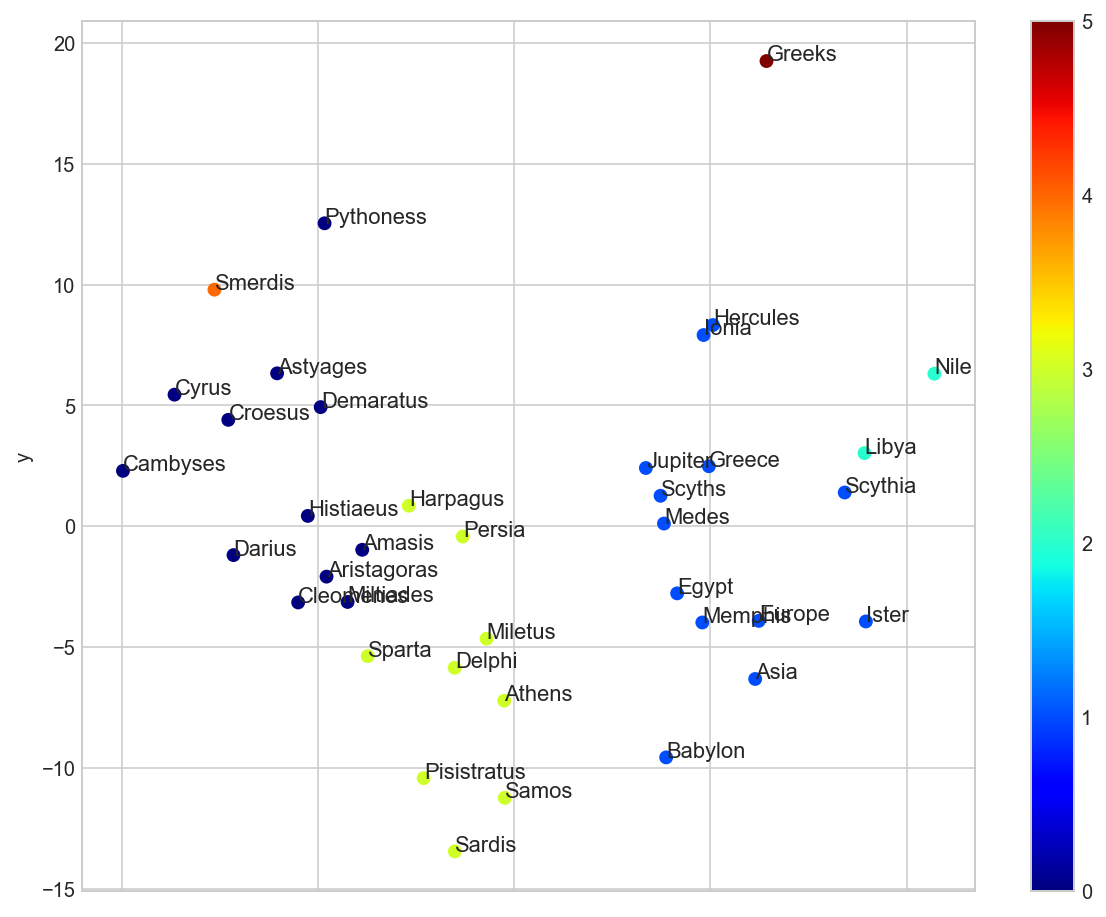

In [132]:
#character association?
AC_model = AgglomerativeClustering(n_clusters=6, affinity='manhattan',linkage='complete')
clusters = AC_model.fit_predict(Vectors)
plot_clusters(charpoints,clusters, x_bounds=(-100,100), y_bounds=(-100,100),colormap='jet')

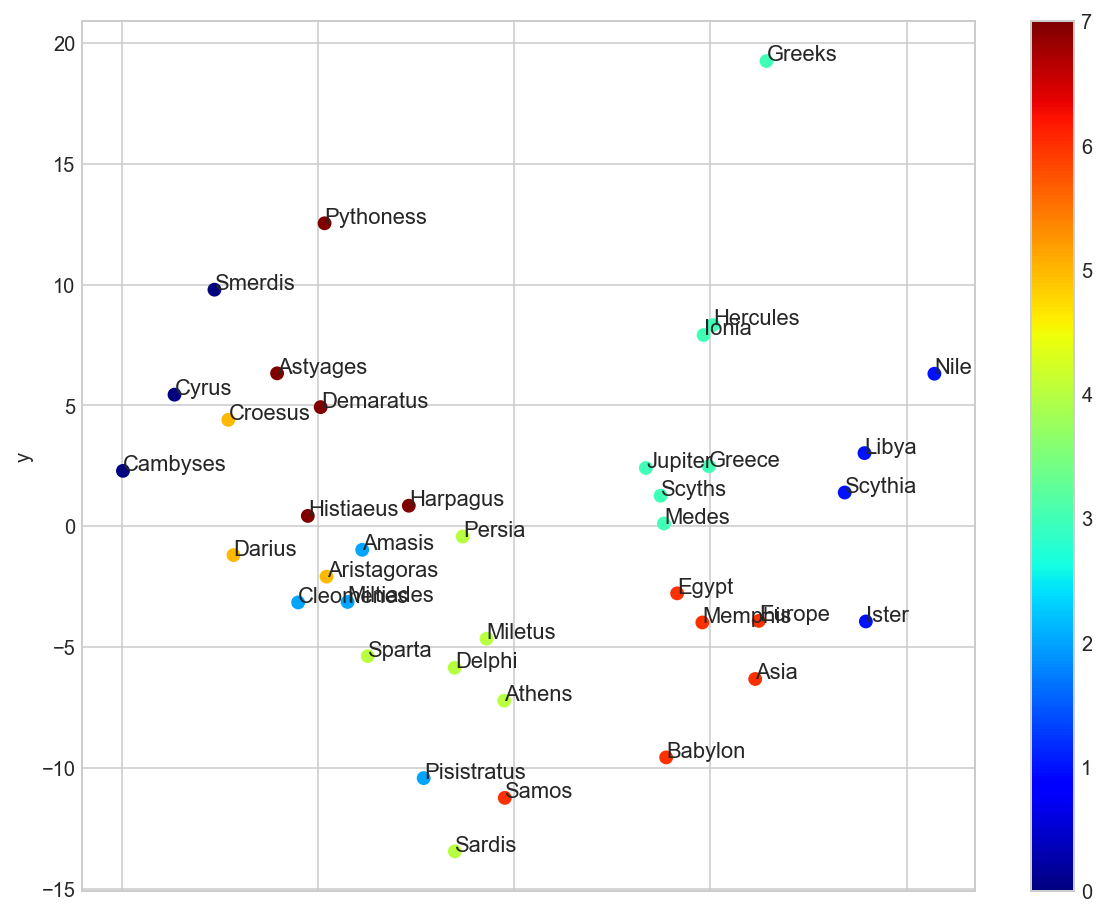

In [135]:
#one of my favorites!
SC_model = SpectralClustering(n_jobs=-2)
clusters = SC_model.fit_predict(Vectors)
plot_clusters(charpoints,clusters, x_bounds=(-100,100), y_bounds=(-100,100),colormap='jet') #increase y to see Dothraki

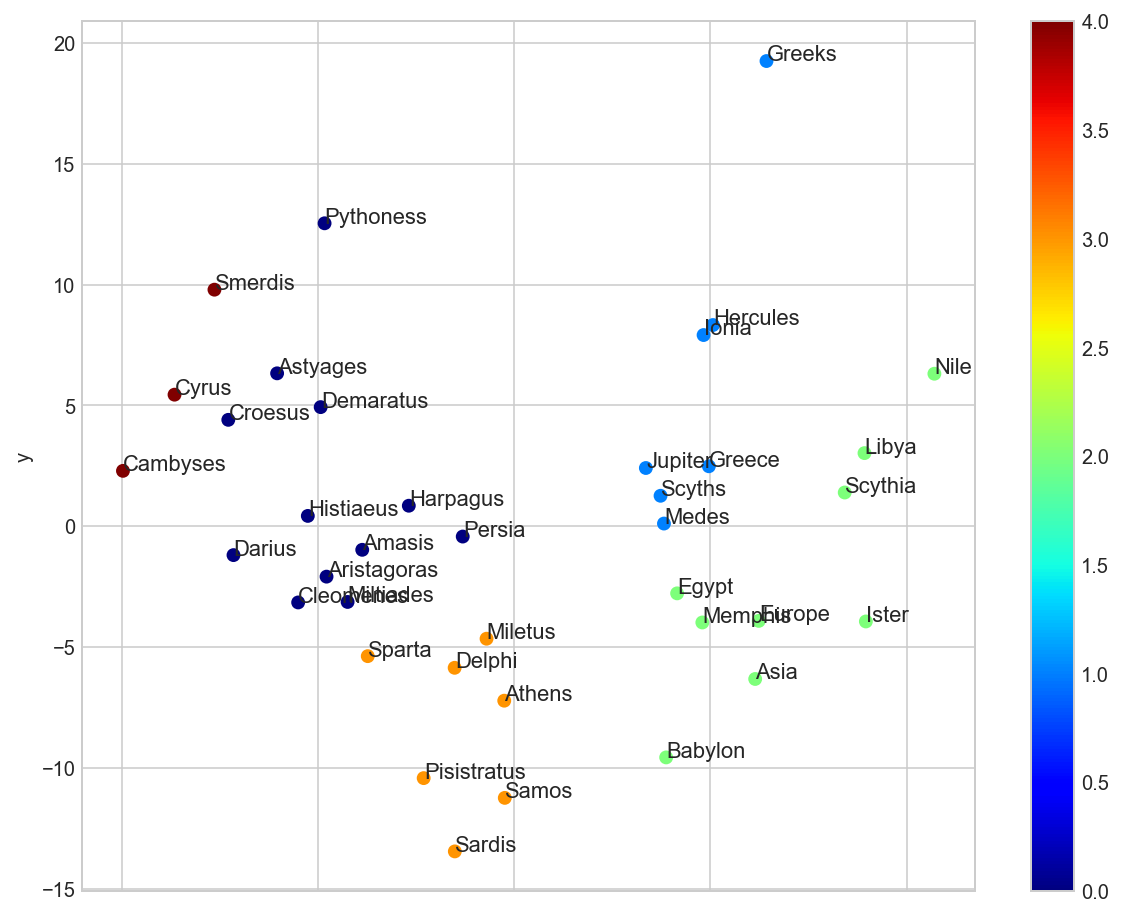

In [138]:
#one of my favorites!
SC_model = SpectralClustering(n_clusters=5, n_jobs=-2)
clusters = SC_model.fit_predict(Vectors)
plot_clusters(charpoints,clusters, x_bounds=(-100,100), y_bounds=(-100,100),colormap='jet') #increase y to see Dothraki

#### pick a clustering to use for the d3

In [139]:
ii = np.argsort(clusters)
namegrouplist = list(zip(np.array(Namelist)[ii],clusters[ii]))
namegrouplist

[('Darius', 0),
 ('Histiaeus', 0),
 ('Harpagus', 0),
 ('Amasis', 0),
 ('Pythoness', 0),
 ('Persia', 0),
 ('Aristagoras', 0),
 ('Miltiades', 0),
 ('Cleomenes', 0),
 ('Croesus', 0),
 ('Demaratus', 0),
 ('Astyages', 0),
 ('Greece', 1),
 ('Medes', 1),
 ('Jupiter', 1),
 ('Scyths', 1),
 ('Greeks', 1),
 ('Hercules', 1),
 ('Ionia', 1),
 ('Memphis', 2),
 ('Europe', 2),
 ('Ister', 2),
 ('Babylon', 2),
 ('Scythia', 2),
 ('Nile', 2),
 ('Libya', 2),
 ('Asia', 2),
 ('Egypt', 2),
 ('Samos', 3),
 ('Sparta', 3),
 ('Miletus', 3),
 ('Sardis', 3),
 ('Athens', 3),
 ('Pisistratus', 3),
 ('Delphi', 3),
 ('Smerdis', 4),
 ('Cambyses', 4),
 ('Cyrus', 4)]

# Narrative Map generation
## need to customize how chapters are identified

In [54]:
chapter_start_indexes = []
for i, line in enumerate(book):
    if 8 < len(line):
        #if word in Namelist: print(word)
        if "Chapter " in line: 
            #print(line,i)
            chapter_start_indexes.append(i)
            
chapter_start_indexes

[]

In [55]:
book[47649]

IndexError: list index out of range

In [155]:
book_chapters = []
chapter_names = []
start_index = 0
for end_index in chapter_start_indexes[1:]:
    book_chapters.append(book[start_index:end_index-1])
    chapter_names.append(book[start_index:end_index-1][0])
    print(book[start_index:end_index-1][0])
    start_index = end_index
chapter_names

####-Chapter I <br>
####-Chapter 2
####-<h4>Chapter 3 </h4> <br>
####-<h4>Chapter 4 </h4> <br>
####-<h4>Chapter 5 </h4> <br>
####-<h4>Chapter 6 </h4> <br>
####-<h4>Chapter 7 </h4> <br>
####-<h4>Chapter 8 </h4> <br>
####-<h4>Chapter 9 </h4> <br> <br>
####-<h4>Chapter 10</h4> <br> 
####-<h4>Chapter 11</h4> <br> 
####-<h4>Chapter 12</h4> <br> 
####-<h4>Chapter 13</h4> <br> 
####-<h4>Chapter 14</h4> <br> 
####-<h4>Chapter 15</h4> <br> 
####-<h4>Chapter 16</h4> <br> 
####-<h4>Chapter 17</h4> <br> 
####-<h4>Chapter 18</h4> <br> 
####-<h4>Chapter 19</h4> <br> 
Chapter 1. A Long-expected Party 
####-<h4>Chapter 2.</h4> <br> The Shadow of the Past 
Chapter 3. Three is Company 
Chapter 4. A Short Cut to Mushrooms 
Chapter 5. A Conspiracy Unmasked 
####-<h4>Chapter 6.</h4> <br> The Old Forest 
Chapter 7. In the House of Tom Bombadil 
Chapter 8. Fog on the Barrow-Downs 
Chapter 9. At the Sign of 
####-<h4>Chapter 10</h4> <br>. Strider 
Chapter 11. A Knife in the Dark 
Chapter 12. Flight to the For

['####-Chapter I <br>',
 '####-Chapter 2',
 '####-<h4>Chapter 3 </h4> <br>',
 '####-<h4>Chapter 4 </h4> <br>',
 '####-<h4>Chapter 5 </h4> <br>',
 '####-<h4>Chapter 6 </h4> <br>',
 '####-<h4>Chapter 7 </h4> <br>',
 '####-<h4>Chapter 8 </h4> <br>',
 '####-<h4>Chapter 9 </h4> <br> <br>',
 '####-<h4>Chapter 10</h4> <br> ',
 '####-<h4>Chapter 11</h4> <br> ',
 '####-<h4>Chapter 12</h4> <br> ',
 '####-<h4>Chapter 13</h4> <br> ',
 '####-<h4>Chapter 14</h4> <br> ',
 '####-<h4>Chapter 15</h4> <br> ',
 '####-<h4>Chapter 16</h4> <br> ',
 '####-<h4>Chapter 17</h4> <br> ',
 '####-<h4>Chapter 18</h4> <br> ',
 '####-<h4>Chapter 19</h4> <br> ',
 'Chapter 1. A Long-expected Party ',
 '####-<h4>Chapter 2.</h4> <br> The Shadow of the Past ',
 'Chapter 3. Three is Company ',
 'Chapter 4. A Short Cut to Mushrooms ',
 'Chapter 5. A Conspiracy Unmasked ',
 '####-<h4>Chapter 6.</h4> <br> The Old Forest ',
 'Chapter 7. In the House of Tom Bombadil ',
 'Chapter 8. Fog on the Barrow-Downs ',
 'Chapter 9. At the S

In [156]:
#turn each chapter into a single string, then word tokenize that string

book_chapters_strings = []
for chapter in book_chapters:
    chapstring = ""
    for line in chapter:
        chapstring +=  " " + line
    book_chapters_strings.append(chapstring)

In [157]:
#tokenize chapters
from nltk.tokenize import word_tokenize, wordpunct_tokenize, WhitespaceTokenizer

# Word Tokenize: Creates tokens from words and punctuation
book_chapters_tokenized = []
for chapter in book_chapters_strings:
    print(chapter)
    book_chapters_tokenized.append(word_tokenize(chapter))

 ####-Chapter I <br>  An Unexpected Party  In a hole in the ground there lived a hobbit. Not a nasty, dirty, wet hole, filled with  the ends of worms and an oozy smell, nor yet a dry, bare, sandy hole with nothing  in it to sit down on or to eat: it was a hobbit-hole, and that means comfort.  It  had  a  perfectly  round  door  like  a  porthole,  painted  green,  with  a  shiny  yellow  brass  knob  in  the  exact middle. The  door  opened  on  to  a  tube-shaped hall  like  a  tunnel:  a  very  comfortable  tunnel without  smoke, with  panelled walls,  and  floors  tiled  and  carpeted,  provided with  polished  chairs,  and  lots  and  lots of pegs  for  hats  and  coats - the hobbit was  fond of visitors. The  tunnel wound on  and on,  going  fairly  but  not  quite  straight  into  the  side  of  the  hill  -  The  Hill,  as  all  the  people for many miles round called  it - and many little round doors opened out of  it,  first  on  one  side  and  then  on  another.  No  going  

 ####-<h4>Chapter 6 </h4> <br>  Out of the Frying-Pan into the Fire     Bilbo had escaped the goblins, but he did not know where he was. He had lost  hood,  cloak,  food,  pony,  his  buttons  and  his  friends. He wandered  on  and  on,  till  the  sun  began  to  sink westwards-behind  the mountains. Their shadows fell across  Bilbo's  path,  and  he  looked  back.  Then  he  looked  forward  and  could  see  before  him  only  ridges  and  slopes  falling  towards  lowlands  and  plains  glimpsed  occasionally between the trees.  "Good  heavens!"  he  exclaimed.  "I  seem  to  have  got  right  to  the  other  side  of  the Misty Mountains,  right  to  the  edge  of  the Land Beyond! Where  and O where  can  Gandalf  and  the  dwarves  have  got  to?  I  only  hope  to  goodness  they  are  not  still back there in the power of the goblins!"  He  still wandered on, out of  the  little high valley, over  its edge, and down  the  slopes beyond; but all the while a very uncomfortable t

 ####-<h4>Chapter 9 </h4> <br> <br>  Barrels Out of Bond     The day  after  the battle with  the  spiders Bilbo  and  the dwarves made one  last  despairing effort  to find a way out before  they died of hunger and  thirst. They got  up  and  staggered  on  in  the  direction  which  eight  out  of  the  thirteen  of  them  guessed to be the one in which the path lay; but they never found out if they were  right.  Such  day  as  there  ever  was  in  the  forest  was  fading  once  more  into  the  blackness of night, when  suddenly out  sprang  the  light of many  torches  all  round  them,  like  hundreds  of  red  stars.  Out  leaped  Wood-elves  with  their  bows  and  spears and called the dwarves to halt.  There  was  no  thought  of  a  fight.  Even  if  the  dwarves  had  not  been  in  such  a  state  that  they  were  actually  glad  to  be  captured,  their  small  knives,  the  only  weapons  they had, would have been of no use against  the arrows of  the elves  that  coul

 ####-<h4>Chapter 15</h4> <br>   The Gathering of the Clouds     Now  we  will  return  to  Bilbo  and  the  dwarves.  All  night  one  of  them  had  watched,  but when morning  came  they  had  not  heard  or  seen  any  sign  of  danger.  But ever more thickly the birds were gathering. Their companies came flying from  the  South;  and  the  crows  that  still  lived  about  the Mountain  were  wheeling  and  crying unceasingly above.  "Something  strange  is  happening,"  said  Thorin.  "The  time  has  gone  for  the  autumn  wanderings;  and  these  are  birds  that  dwell  always  in  the  land;  there  are  starlings  and  flocks  of  finches;  and  far  off  there  are  many  carrion  birds  as  if  a  battle were afoot!"  Suddenly Bilbo pointed: "There  is  that old  thrush again!" he cried. "He seems  to have escaped, when Smaug  smashed  the mountain-side, but I don't suppose the  snails have!"  Sure  enough  the  old  thrush was  there,  and  as  Bilbo  pointed,  he  flew 

 ####-<h4>Chapter 2.</h4> <br> The Shadow of the Past            The talk did not die down in nine  or even ninety-nine days. The second  disappearance of Mr. Bilbo Baggins was discussed in Hobbiton, and indeed all  over the Shire,  for a year  and a day,  and was remembered much longer than  that.  It became  a fireside -story for  young  hobbits;  and eventually  Mad  Baggins,  who used to vanish with a  bang and a flash and reappear with bags  of jewels and gold, became a favourite character of legend and lived on long   after all the true events were forgotten.       But in the meantime, the general opinion in the  neighbourhood was that  Bilbo, who  had always been rather cracked, had at  last gone quite mad, and   had run off into the Blue. There he had  undoubtedly fallen into a pool or a   river and  come to a tragic,  but  hardly an  untimely, end.  The blame  was  mostly laid on Gandalf.       'If only that  dratted  wizard will leave young  Frodo  alone,  perhaps  he'll  set

 ####-<h4>Chapter 6.</h4> <br> The Old Forest            Frodo woke suddenly. It was still dark in  the room. Merry was standing  there with a candle  in one hand, and banging  on the  door with the  other.  'All right! What is it?' said Frodo, still shaken and bewildered.       'What is it!' cried Merry. 'It is  time to get up. It is half past four  and very foggy. Come on! Sam is already getting breakfast ready. Even Pippin  is up. I am just going to saddle the ponies, and fetch the one that is to be  the  baggage-carrier. Wake that sluggard Fatty! At least he must get up  and   see us off.'       Soon after  six o'clock the  five  hobbits were  ready  to start. Fatty  Bolger was still yawning. They stole quietly out of the house. Merry went in  front leading a laden pony, and took his way along a path that  went through  a spinney behind  the house, and then  cut across several fields. The leaves  of  trees were  glistening, and every twig  was dripping; the grass was grey  with  co

 Chapter 11. A Knife in the Dark            As  they prepared  for sleep  in  the  inn at  Bree,  darkness  lay  on  Buckland; a mist strayed in the dells and along the river -bank. The house at  Crickhollow stood silent. Fatty Bolger opened the door cautiously and peered  out. A feeling of fear had been growing on him all day, and he was unable to  rest or go to bed: there was a brooding threat  in the breathless night-air.  As he  stared out into the gloom, a black shadow moved under the trees;  the  gate  seemed  to open  of its own  accord and close again without  a  sound.  Terror seized him. He  shrank  back,  and for a moment he stood trembling in  the hall. Then he shut and locked the door.       The night  deepened.  There  came  the  soft  sound of horses  led with  stealth  along the  lane.  Outside  the gate  they stopped, and three  black   figures entered,  like shades of night  creeping across the ground. One went  to the door, one to the corner of the house on  either s

 Chapter 2. The Council of Elrond            Next day Frodo woke  early, feeling refreshed and well. He walked along   the terraces above  the  loud-flowing Bruinen and watched the pale, cool sun  rise  above the far  mountains, and shine  down. Slanting  through the  thin  silver mist;  the dew upon the  yellow leaves was glimmering, and  the woven  nets of  gossamer twinkled  on  every bush.  Sam  walked beside  him, saying  nothing.  but  sniffing the air, and looking every now and again with wonder   in his eyes at the great heights in the East. The snow was white upon  their  peaks.       On a seat cut  in  the  stone beside  a turn in the path they came upon  Gandalf and  Bilbo  deep in  talk. `Hullo!  Good morning!' said Bilbo. `Feel   ready for the  great council?'       `I feel ready  for anything,' answered Frodo. `But most of all I should  like to go walking  today and  explore the valley. I should like to get into  those pine-woods up there.' He pointed away far up the side

 Chapter 4. A Journey in the Dark            It was  evening, and the  grey light  was again  waning fast, when they  halted  for the night. They were very  weary.  The mountains were veiled  in  deepening dusk, and the wind was cold. Gandalf spared them one more  mouthful  each of the miruvor  of Rivendell. When they had eaten some food he called a   council.        'We cannot, of  course, go on again  tonight,' he said. `The attack   on  the Redhorn Gate has tired us out, and we must rest here for a while.'       `And then where are we to go? ' asked Frodo.       'We still have our journey and our errand before us,' answered Gandalf.   `We have no choice but to go on, or to return to Rivendell.'       Pippin's  face brightened visibly at the  mere  mention  of  return  to  Rivendell; Merry and Sam looked  up hopefully. But Aragorn  and Boromir  made  no sign. Frodo looked troubled.        `I wish I was back there,' he said. `But how can I return without shame  -- unless there is inde

 Chapter 7. The Mirror of Galadriel            The  sun  was  sinking  behind  the  mountains,  and the  shadows  were  deepening in the woods, when  they went on again.  Their paths now went into  thickets  where  the dusk had already gathered. Night came beneath the trees  as they walked, and the Elves uncovered their silver lamps.        Suddenly they came out into the open again and found themselves under a  pale evening sky pricked by a  few early  stars.  There  was a wide treeless  space  before  them, running in a  great circle  and bending  away on  either   hand. Beyond it was a deep fosse lost in soft shadow, but the grass upon its  brink was green, as if it  glowed still in memory of the sun that  had gone.  Upon the further side there rose to a great height a green wall encircling a   green hill thronged with mallorn-trees taller than any they had yet seen  in  all the land. Their height  could not be  guessed,  but they stood up in the  twilight like living towers. In  th

 Chapter 1. The Departure of Boromir            Aragorn sped on up the hill. Every now and again he bent to the ground.  Hobbits go light, and  their  footprints are not  easy  even for a Ranger to  read, but not  far from the top a spring  crossed  the path, and in the  wet  earth he saw what he was seeking.       'I read the  signs  aright,'  he  said  to himself. 'Frodo  ran  to the  hill-top. I wonder what he  saw there? But he returned by  the same way, and  went down the hill again.'       Aragorn hesitated. He desired to go to the high seat himself, hoping to  see there something that  would guide him in his perplexities; but  time was  pressing. Suddenly he leaped  forward, and  ran to the  summit,  across  the  great flag-stones, and up the steps. Then sitting in the high seat he looked  out. But the  sun seemed darkened,  and the world dim and remote.  He turned  from the North back again to North, and saw nothing save  the distant hills,   unless it were  that far away he co

 ####-<h4>Chapter 4.</h4> <br> Treebeard            Meanwhile the hobbits went with  as much speed as  the dark and tangled   forest allowed, following  the line of the  running  stream, westward and up  towards the slopes of the mountains, deeper and deeper into  Fangorn. Slowly  their fear of the Orcs died away, and their pace slackened. A queer stifling  feeling came  over  them,  as  if the air were  too thin or too  scanty  for   breathing.       At last Merry halted.  'We can't go on like this,' he  panted.  'I want  some air.'       'Let's have  a  drink  at any rate,'  said  Pippin. 'I'm  parched.'  He  clambered on to a  great tree-root that  wound  down  into the  stream,  and  stooping drew up some water in his cupped hands. It was clear and  cold, and  he  took many draughts.  Merry followed  him.  The water refreshed them  and  seemed  to cheer their hearts; for a while they sat together on the brink of  the  stream,  dabbling  their  sore feet and legs, and peering round 

 Chapter 7. Helm's Deep            The sun was  already westering as they rode  from Edoras, and the light  of it was in their eyes, turning all the rolling fields of Rohan to a golden  haze. There was  a beaten way,  north-westward  along the foot-hills  of the  White Mountains,  and  this they  followed, up and  down in a green country,  crossing small swift streams by many fords. Far ahead and to their right the  Misty Mountains  loomed; ever darker  and taller they grew as the miles went  by. The sun went slowly down before them. Evening came behind.       The  host rode on. Need drove them. Fearing to come too late, they rode  with all the speed they  could, pausing seldom. Swift and  enduring were the  steeds of Rohan, but there were many leagues to go. Forty  leagues  and more  it was,  as  a bird flies, from Edoras to the fords of  the Isen, where they  hoped to find the king's men that held back the hosts of Saruman.       Night closed about them. At last they  halted  to make

 Chapter 10. The Voice of Saruman            They passed through the ruined tunnel and stood upon a heap of  stones,  gazing at the  dark rock of Orthanc, and its many windows, a menace still in  the  desolation  that  lay  all about  it.  The waters  had  now  nearly all  subsided.  Here  and  there  gloomy pools  remained,  covered with  scum and  wreckage; but most of the wide circle was bare again, a  wilderness of slime  and tumbled  rock, pitted with  blackened holes, and  dotted  with posts and  pillars  leaning  drunkenly this  way and that. At the rim of the  shattered  bowl  there lay vast mounds and slopes, like the shingles cast up by a great  storm; and  beyond them the  green and  tangled valley  ran up into the long   ravine  between the  dark arms  of  the mountains. Across the waste they saw  riders picking their way; they were coming from the north  side, and already  they were drawing near to Orthanc.       'There is  Gandalf, and Thjoden and his men!' said Legolas. 

 Chapter 3. The Black Gate is Closed            Before  the  next day dawned  their journey to  Mordor  was  over.  The  marshes and the desert  were  behind them. Before  them, darkling  against a   pallid sky, the great mountains reared their threatening heads.        Upon the west of  Mordor marched the gloomy range  of  Ephel D®ath, the  Mountains of Shadow, and upon the north  the broken peaks and barren  ridges  of  Ered  Lithui, grey as ash. But as these ranges  approached one  another,  being indeed  but  parts  of  one  great  wall about  the mournful plains of  Lithlad and of Gorgoroth, and the bitter inland sea of N®rnen amidmost, they  swung out  long arms northward;  and between  these arms  there  was a  deep  defile.  This was Cirith Gorgor,  the Haunted Pass, the entrance to the land  of the Enemy. High cliffs lowered upon either side, and thrust forward  from  its mouth were two  sheer  hills, black -boned and bare. Upon  them stood the  Teeth  of  Mordor, two towers s

 Chapter 7. Journey to the Cross-roads            Frodo and Sam returned  to their  beds and lay there in silence resting  for a little,  while men bestirred themselves  and  the business of the  day  began. After a while water was brought to them,  and then they were led to a   table where food was set for three. Faramir broke his fast with them. He had  not slept since the battle on the day before, yet he did not look weary.       When they had finished they stood up. `May no hunger trouble you on the  road,'  said  Faramir. `You  have little provision, but some small  store of  food fit for travellers I have ordered to be stowed  in your packs. You will  have  no lack  of  water as you walk in Ithilien,  but  do not  drink of any  stream that flows from Imlad Morgul, the Valley of Living Death. This also I  must tell you. My scouts and watchers  have all returned, even some that have  crept within sight of the Morannon. They all find  a strange thing. The land  is empty.  Nothing  i

 Chapter 1. Minas Tirith            Pippin  looked out from  the shelter of Gandalf's cloak. He wondered if  he was awake or still sleeping, still in the  swift-moving dream in which he  had  been  wrapped so long since the  great  ride  began. The dark world was  rushing by and  the wind sang loudly in his ears. He could  see nothing  but  the wheeling stars, and away to his right vast shadows against the sky where  the mountains of the  South  marched past.  Sleepily he tried  to reckon the  times and stages of their journey, but his memory was drowsy and uncertain.       There  had been the first  ride at terrible speed without  a  halt, and  then in the dawn he had  seen a pale gleam of gold, and they had come to the  silent  town  and the great empty house on  the  hill.  And  hardly had they  reached its shelter when the winged shadow  had passed  over once again, and  men wilted with fear. But Gandalf had spoken  soft words to him,  and he had  slept in a corner, tired but uneas

 Chapter 5. The Ride of the Rohirrim            It was dark and Merry could see  nothing as he lay on the ground rolled  in a blanket; yet  though the night was airless and windless, all  about him  hidden  trees were sighing  softly. He lifted  his  head.  Then he heard  it  again: a  sound like faint drums in the wooded hills and mountain-steps. The  throb would cease suddenly and then be taken up again  at some other  point,  now nearer, now further off. He wondered if the watchmen had heard it.       He  could not see  them,  but he  knew  that  all  round  him were  the  companies of the Rohirrim. He could smell the horses in  the dark, and could  hear their shiftings  and their soft stamping on  the needle-covered ground.  The host  was bivouacked in  the  pine-woods that  clustered about  Eilenach   Beacon, a tall  hill standing up from  the long ridges of the Dr®adan Forest   that lay beside the great road in East Anurien.       Tired as he was Merry could not sleep. He had rid

 Chapter 10. The Black Gate Opens            Two days later the army of the West was all assembled on the  Pelennor.   The host of Orcs and Easterlings had turned back out of Anurien, but harried  and scattered by the Rohirrim they had  broken and fled with little fighting  towards Cair  Andros;  and with  that  threat  destroyed  and  new  strength  arriving out of the South the City  was as well  manned  as might be. Scouts  reported  that  no  enemies remained  upon the  roads  east  as  far  as the  Cross-roads of the Fallen King. All now was ready for the last throw.        Legolas and Gimli were to ride again together in the company of Aragorn  and Gandalf, who went in the  van with the D®nedain  and the sons of Elrond.  But Merry to his shame was not to go with them.       'You are  not fit for  such a  journey,' said  Aragorn. 'But  do not be  ashamed.  If  you do no  more  in  this  war, you have already earned  great  honour. Peregrin shall go and represent the Shirefolk; and

 Chapter 4. The Field of Cormallen            All about the hills the hosts of Mordor raged. The Captains of the West   were foundering in a gathering sea. The sun gleamed red, and under the wings  of the Nazgyl  the shadows of death fell dark upon the earth. Aragorn  stood  beneath his  banner,  silent and stern, as one lost in thought of things long  past or far away; but his eyes gleamed like stars that shine the brighter as  the  night deepens.  Upon the hill-top stood Gandalf,  and  he was white and  cold and no shadow fell on him. The onslaught of Mordor broke like a wave on  the beleaguered hills,  voices roaring like a tide amid the  wreck and crash  of arms.        As  if to his eyes some sudden vision had  been given, Gandalf stirred;  and  he turned, looking back north where the skies were pale and clear. Then  he lifted up his hands and cried in  a loud voice ringing above the din: The  Eagles are coming! And many voices answered crying:  The  Eagles are  coming!  The Eagle

 Chapter 8. The Scouring of the Shire            It was after nightfall when, wet and tired, the travellers came at last   to  the Brandywine, and  they found  the way  barred. At  either  end of the  Bridge there was a great  spiked gate;  and on the further side of the river   they could see that some new houses had been built: two-storeyed with narrow  straight-sided   windows,  bare   and   dimly  lit,  all  very   gloomy  and  un-Shirelike.       They  hammered on  the outer gate and called, but there was at first no   answer;  and then to their  surprise someone blew a horn, and  the lights in  the windows went out. A voice shouted in the dark:       'Who's that?  Be off! You  can't come in: Can't you read the notice: No  admittance between sundown and sunrise?'       'Of  course we can't read the notice  in the  dark.' Sam shouted  back.  'And if hobbits of the Shire are to be  kept out in the wet on  a night like  this, I'll tear down your notice when I find it.'       At that 

In [158]:
characters_in_chapter = []
for chapter in book_chapters_tokenized:
    names_in_chapter = []
    for name in Namelist:
        name_count = chapter.count(name)
        if name_count >= 5:        #include minimum count to eliminate stray references
            names_in_chapter.append(name)
    characters_in_chapter.append(names_in_chapter)

characters_in_chapter

[['Gandalf', 'Bilbo', 'Thorin'],
 ['Gandalf', 'Bilbo', 'Thorin'],
 ['Gandalf', 'Bilbo', 'Thorin', 'Elrond'],
 ['Gandalf', 'Bilbo', 'Thorin'],
 ['Bilbo', 'Gollum'],
 ['Gandalf', 'Bilbo'],
 ['Gandalf', 'Bilbo', 'Thorin'],
 ['Bilbo', 'Thorin'],
 ['Bilbo', 'Thorin'],
 ['Bilbo', 'Thorin'],
 ['Bilbo', 'Thorin'],
 ['Bilbo', 'Thorin'],
 ['Bilbo', 'Thorin'],
 [],
 ['Bilbo', 'Thorin'],
 ['Bilbo', 'Thorin'],
 ['Gandalf', 'Bilbo', 'Thorin'],
 ['Gandalf', 'Bilbo', 'Thorin'],
 ['Gandalf', 'Bilbo', 'Elrond'],
 ['Frodo', 'Gandalf', 'Bilbo', 'Merry'],
 ['Frodo', 'Sam', 'Gandalf', 'Bilbo', 'Gollum', 'Smjagol', 'Sauron'],
 ['Frodo', 'Sam', 'Gandalf', 'Bilbo', 'Pippin', 'Merry'],
 ['Frodo', 'Sam', 'Pippin', 'Merry'],
 ['Frodo', 'Sam', 'Gandalf', 'Bilbo', 'Pippin', 'Merry'],
 ['Frodo', 'Sam', 'Pippin', 'Merry'],
 ['Frodo'],
 ['Frodo', 'Sam', 'Pippin', 'Merry'],
 ['Frodo', 'Sam', 'Pippin', 'Strider'],
 ['Frodo', 'Sam', 'Gandalf', 'Pippin', 'Merry', 'Strider'],
 ['Frodo', 'Sam', 'Gandalf', 'Pippin', 'Merry',

### Write json for the d3

In [140]:
#the one is for the web d3
json = """{
  "nodes": [
"""

for name,group in namegrouplist:
    json = json + "    {\"id\": \"" + name + "\", \"group\": " + str(group) + "},\n"

json = json[:-2] + """   ],      
  "links": [ 
"""  #[:-2] leaves out ,\n on last line before adding square bracket

for line in interaction_map:
    if line[2]>=15:
        json = json + "    {\"source\": \"" + line[0] + "\", \"target\": \"" + line[1] + "\", \"value\": " + str(line[2]) + "},\n"

json = json[:-2] + """  ]
}"""

In [141]:
file = open("/Users/dlicht/Dropbox/_Metis_Bootcamp/projects/projectfletcher/d3/"+bookfile[-4]+"_interactions.json",'w')   #'x' creates a new file and opens it for writing
file.write(json)
file.close()

In [142]:
print(json)

{
  "nodes": [
    {"id": "Darius", "group": 0},
    {"id": "Histiaeus", "group": 0},
    {"id": "Harpagus", "group": 0},
    {"id": "Amasis", "group": 0},
    {"id": "Pythoness", "group": 0},
    {"id": "Persia", "group": 0},
    {"id": "Aristagoras", "group": 0},
    {"id": "Miltiades", "group": 0},
    {"id": "Cleomenes", "group": 0},
    {"id": "Croesus", "group": 0},
    {"id": "Demaratus", "group": 0},
    {"id": "Astyages", "group": 0},
    {"id": "Greece", "group": 1},
    {"id": "Medes", "group": 1},
    {"id": "Jupiter", "group": 1},
    {"id": "Scyths", "group": 1},
    {"id": "Greeks", "group": 1},
    {"id": "Hercules", "group": 1},
    {"id": "Ionia", "group": 1},
    {"id": "Memphis", "group": 2},
    {"id": "Europe", "group": 2},
    {"id": "Ister", "group": 2},
    {"id": "Babylon", "group": 2},
    {"id": "Scythia", "group": 2},
    {"id": "Nile", "group": 2},
    {"id": "Libya", "group": 2},
    {"id": "Asia", "group": 2},
    {"id": "Egypt", "group": 2},
    {"id": 

In [162]:
#for the matrix d3
json = """{
  "nodes": [
"""

for name,group in namegrouplist:
    json = json + "    {\"name\": \"" + name + "\", \"group\": " + str(group) + "},\n"

json = json[:-2] + """   ],      
  "links": [ 
"""  #[:-2] leaves out ,\n on last line before adding square bracket

for line in interaction_map_all:
    json = json + "    {\"source\": \"" + str(Namelist.index(line[1])) + "\", \"target\": \"" + str(Namelist.index(line[0])) + "\", \"value\": " + str(line[2]) + "},\n"

json = json[:-2] + """  ]
}"""

In [163]:
file = open("/Users/dlicht/Dropbox/_Metis_Bootcamp/projects/projectfletcher/d3/"+bookfile[-4]+"_interactions_matrix_draft.json",'w')   #'x' creates a new file and opens it for writing
file.write(json)
file.close()

In [164]:
print(json)

{
  "nodes": [
    {"name": "Sam", "group": 0},
    {"name": "Bilbo", "group": 0},
    {"name": "Gollum", "group": 0},
    {"name": "Faramir", "group": 1},
    {"name": "Legolas", "group": 1},
    {"name": "Gimli", "group": 1},
    {"name": "Aragorn", "group": 1},
    {"name": "Gandalf", "group": 1},
    {"name": "Merry", "group": 2},
    {"name": "Treebeard", "group": 2},
    {"name": "Pippin", "group": 2},
    {"name": "Strider", "group": 2},
    {"name": "Thjoden", "group": 3},
    {"name": "Elrond", "group": 3},
    {"name": "Jomer", "group": 3},
    {"name": "Boromir", "group": 4},
    {"name": "Thorin", "group": 4},
    {"name": "Frodo", "group": 5},
    {"name": "Saruman", "group": 6},
    {"name": "Sauron", "group": 6},
    {"name": "Smjagol", "group": 7}   ],      
  "links": [ 
    {"source": "1", "target": "0", "value": 1314},
    {"source": "2", "target": "0", "value": 408},
    {"source": "3", "target": "0", "value": 311},
    {"source": "4", "target": "0", "value": 169},


In [165]:
ID_in_chapter = []
for chapter in characters_in_chapter:
    this_chapt = []
    for name in chapter:
        this_chapt.append(name[0:4])
    ID_in_chapter.append(this_chapt)

In [166]:
#for the Narrative map d3
json = """
{
  "characters": [
       
"""
cluster = "light"

for name,cluster in namegrouplist:
#for name in Namelist:
    json = json + "       {\"id\": \"" + name[0:4] + "\", \"name\": \"" + name + "\", \"affiliation\": \"" + str(cluster) + "\"},\n"
    #json = json + "    {\"name\": \"" + name + "\", \"group\": " + str(group) + "},\n"

json = json[:-2] + """
],
  "scenes": [
"""  #[:-2] leaves out ,\n on last line before adding square bracket

for chapt in ID_in_chapter:
    json = json + "      " + str(chapt) + ",\n"

json = json[:-2] + """  
]
}"""

json = json.replace("'","\"")  #javascript doesn't like single quotes
print(json)


{
  "characters": [
       
       {"id": "Sam", "name": "Sam", "affiliation": "0"},
       {"id": "Bilb", "name": "Bilbo", "affiliation": "0"},
       {"id": "Goll", "name": "Gollum", "affiliation": "0"},
       {"id": "Fara", "name": "Faramir", "affiliation": "1"},
       {"id": "Lego", "name": "Legolas", "affiliation": "1"},
       {"id": "Giml", "name": "Gimli", "affiliation": "1"},
       {"id": "Arag", "name": "Aragorn", "affiliation": "1"},
       {"id": "Gand", "name": "Gandalf", "affiliation": "1"},
       {"id": "Merr", "name": "Merry", "affiliation": "2"},
       {"id": "Tree", "name": "Treebeard", "affiliation": "2"},
       {"id": "Pipp", "name": "Pippin", "affiliation": "2"},
       {"id": "Stri", "name": "Strider", "affiliation": "2"},
       {"id": "Thjo", "name": "Thjoden", "affiliation": "3"},
       {"id": "Elro", "name": "Elrond", "affiliation": "3"},
       {"id": "Jome", "name": "Jomer", "affiliation": "3"},
       {"id": "Boro", "name": "Boromir", "affiliation":

In [167]:
file = open("/Users/dlicht/Dropbox/_Metis_Bootcamp/projects/projectfletcher/d3/"+bookfile[-4]+"_narrative_draft.json",'w')   #'x' creates a new file and opens it for writing
file.write(json)
file.close()